## Chapter 6 - Conceptual

1. We perform best subset, forward stepwise, backward stepwise selection on a single 
data set. We obtain p+1 model containing 0, 1, 2...p predictors.   
    - (a) The best subset selection method will always have the lowest RSS on training data
simply because they consider all possibilities including those of forward and backward
selection. In contrast, forward and backward selection may leave out variable which can 
lower RSS later on.  
    - (b) Best subset selection might have the lowest RSS on test set because of the many
model it considers. However, forward and backward can pick out a model that fit better
(not over-fitting) than best subset.  
    - (c) True or False
        - True. Predictors in k model is a subset in k+1 model in forward selection.
        - True. Same as above.
        - False. Forward and backward have different variables.
        - False. Same as above.
        - False. Since best subset with k+1 does not necessarily include all of k model. 

2. True or False
    1. The lasso, relative to least square, is:
        1. False
        2. False
        3. True. Less flexible, when increase in bias is less than decrease in variance.
        4. False
    2. Ridge regression, relative to least square is also less flexible. Hence, it will
    give improve accuracy when increase in bias is less than decrease in variance. 
    3. Non-linear methods, relative to least square, are greatly more flexible. Hence,
    it will give improve accuracy when increase in bias is less than decrease in variance.
 
3. Suppose estimate coefs by minimizing the following
\begin{equation}
\sum_{i=1}^{n} \left (y_i -\beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right )
\end{equation} subject to 
\begin{equation}
\sum_{j=1}^{p} \left\lvert {\beta_j} \right\rvert \le s 
\end{equation}
for a particular value of s.

    1. As we increase s from 0, the training RSS will:
        1. Steadily decrease since we are going from 0 variance to the least square
        estimate of the coefficients. 
    2. Test Rss will decrease initially and then increase in a U-shape. As the model
    get more flexible, it fit model. But as model keep getting even more flexible,
    overfitting appears and create the U-shape.
    3. Variance will steadily increase. As we adding more coefficients, the less bias
    we get but more variance is introduced to the model.
    4. Square bias will decrease steadily. Explanation as above.
    5. Irreducible error remains constant as it does not change with any coefficients 
    or our models.

4. Suppose estimate coefs by minimizing the following
\begin{equation}
\sum_{i=1}^{n} \left (y_i -\beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right )
+ \lambda \sum_{j=1}^{p} {\beta_j}^2
\end{equation}

    1. At $\lambda = 0$, this is a least squares. As $\lambda$ increases from
    0, training RSS will steadily increase as the coefficients are shrinking.
    2. Test RSS will decrease initially then increasing in an U shape. As model coefs
    shrink, the decrease in variance is larger than increase in bias. However, after 
    a point, the increase in bias overtakes and thus increase our test RSS
    3. Variance will steadily decrease as model get less flexible.
    4. (squared) bias will steadily increase as model get less flexible.
    5. Irreducible error is once again not affected by our model whatsoever. 

5. Exploring how Ridge regression and Lasso treat correlated variables. 
Lets $n=2, p=2, x_{11} = x_{12}, x_{21}=x_{22}$. Suppose also that 
$y_1+y_2=0, x_{11}+x_{21}=0, x_{12}+x_{22}=0$. Thus we have $\hat{\beta_0}=0$  

(a)
Plug in the above parameters into general form of Ridge regression. We want to minimize

\begin{align}
&\sum_{i=1}^{2} \left (y_i -\hat\beta_0 - \sum_{j=1}^{2} \hat\beta_j x_{ij} \right )^2
+ \lambda \sum_{j=1}^{2} {\hat\beta_j}^2 \\
&= (y_1 - \hat\beta_1 x_{11}-\hat\beta_1 x_{12})^2 + (y_1-\hat\beta_2 x_{21}-\hat\beta_1 x_{22})^2 +
\lambda(\hat\beta_1 ^2 + \hat\beta_2 ^2)\\
\end{align}

(b) Differentiate the expression in (a) wrt. $\hat{\beta_1}$ and $\hat{\beta_2}$ we have
\begin{equation}
\hat\beta_1 = \frac {x_1y_1 + x_2y_2 + 2\hat\beta_1x_1x_2 + 2\hat\beta_2x_1x_2}
{\lambda}\\
\hat\beta_2 = \frac {x_1y_1 + x_2y_2 + 2\hat\beta_1x_1x_2 + 2\hat\beta_2x_1x_2}
{\lambda}
\end{equation}
Thus, $\hat\beta_1 = \hat\beta_2$

(c) Similarly, Lasso will try to minimize  
\begin{align}
&= (y_1 - \hat\beta_1 x_{11}-\hat\beta_1 x_{12})^2 + (y_1-\hat\beta_2 x_{21}-\hat\beta_1 x_{22})^2 +
\lambda(\lvert\hat\beta_1 \rvert + \lvert \hat\beta_2 \rvert)\\
\end{align}

(d) Again, taking derivative wrt 2 beta gives us
\begin{equation}
\lambda\frac{|\beta_1|}{\beta_1} = \lambda\frac{|\beta_2|}{\beta_2}
\end{equation}

Thus, there are many different solutions to the optimization problem.

6. Consider 6.12 and 6.13  
(a) with p=1 we have
\begin{equation}
(y_1 - \hat\beta_1)^2+ \lambda \hat\beta_1 ^2 
\end{equation}

Text(0.5, 1.0, '6.12 as a function of beta 1')

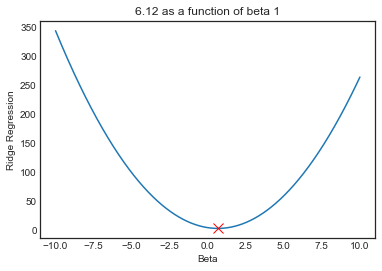

In [44]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

# parameters and function
y = 2
alpha = 2
beta = np.linspace(-10, 10, num=1000)
f = np.power((y - beta),2) + alpha*np.power(beta, 2)
min_f = min(f)
min_f_beta = beta[np.argmin(f)]

# plot
plt.plot(beta, f)
plt.plot(min_f_beta, min_f, color='r', marker='x', markersize=10)
plt.ylabel('Ridge Regression')
plt.xlabel('Beta')
plt.title('6.12 as a function of beta 1')

The plot also confirm that solution is 0.5 which is given by 6.14.

Similarly, we for Lasso we have  
\begin{equation}
(y_1 - \hat\beta_1)^2+ \lambda \lvert \hat\beta_1 \rvert 
\end{equation}

Text(0.5, 1.0, '6.13 as a function of beta 1')

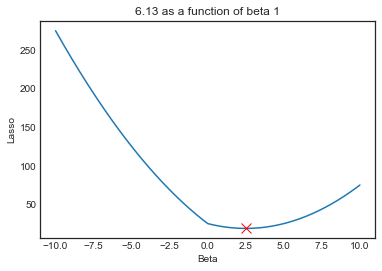

In [46]:
y = 5
alpha = 5
beta = np.linspace(-10, 10, num=10000)
f = (y - beta)**2 + alpha*(np.abs(beta))
min_f = min(f)
min_f_beta = beta[np.argmin(f)]

# plot
plt.plot(beta, f)
plt.plot(min_f_beta, min_f, color='r', marker='x', markersize=10)
plt.ylabel('Lasso')
plt.xlabel('Beta')
plt.title('6.13 as a function of beta 1')

We also get beta = y - alpha/2 = 5 - 2.5 = 2.5 as given in 6.15
